In [18]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [28]:
import pandas as pd
df = pd.read_csv("data.csv")

In [29]:
df.head()

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg


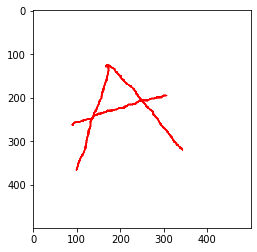

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/a1.jpg')

plt.imshow(img, cmap='gray')

In [31]:
image_path = df["path"].tolist()

In [32]:
train_image = []
for image_name in image_path:
    img = image.load_img('images/'+image_name, target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255 # Normalization
    train_image.append(img)
X = np.array(train_image)

In [46]:
y = df['label'].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [58]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [59]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [96]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Train on 133 samples, validate on 34 samples
Epoch 1/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.3525 - accuracy: 0.8947 - val_loss: 6.9196 - val_accuracy: 0.1176
Epoch 2/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.3549 - accuracy: 0.9023 - val_loss: 6.9394 - val_accuracy: 0.1176
Epoch 3/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.2624 - accuracy: 0.9624 - val_loss: 6.9548 - val_accuracy: 0.1471
Epoch 4/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.3070 - accuracy: 0.9248 - val_loss: 6.9882 - val_accuracy: 0.1471
Epoch 5/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.3275 - accuracy: 0.9248 - val_loss: 7.0202 - val_accuracy: 0.1176
Epoch 6/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.1951 - accuracy: 0.9474 - val_loss: 7.1076 - val_accuracy: 0.1176
Epoch 7/30
133/133 [==============================] - 0s 3ms/sample - loss: 0.2095 - accura

In [103]:
img = image.load_img('images/'+"d7.jpg", target_size=(28,28,1), grayscale=True)
img = image.img_to_array(img)
img = img/255
model.predict_classes([[img]])

array([3], dtype=int64)